
<div style="font-size: 35px; color: brown; text-align: center; background-color: violet; padding: 10px;"><b>Diebetes Prediction</b></div>


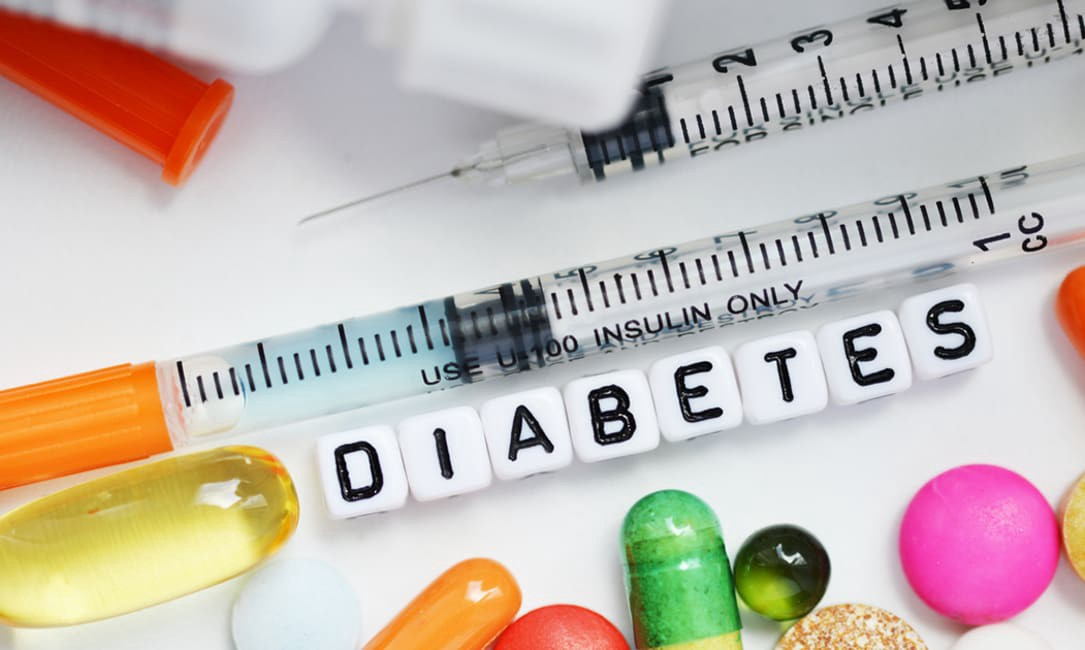

<b><span style="color: blue; font-size: 18px;">Import Libraries</span></b>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

<b><span style="color: blue; font-size: 18px;">Read the Dataset</span></b>

In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv") 

In [3]:
df 

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


<b><span style="color: blue; font-size: 18px;">Data Cleaning</span></b>

In [4]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [5]:
df.duplicated().sum()

3854

##### In this dataset, there are 3854 instances of duplicate values, therefore they should be eliminated.

In [6]:
df = df.drop_duplicates()

In [7]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [9]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [10]:
df['smoking_history'].value_counts()

smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64

<b><span style="color: blue; font-size: 18px;">Data Visualization</span></b>

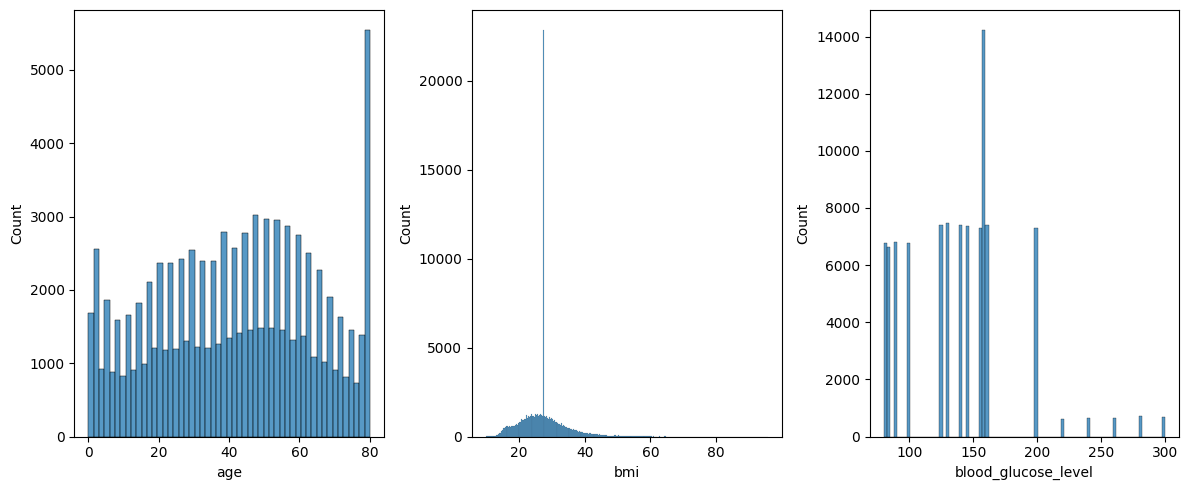

In [11]:
fig, ax = plt.subplots(1, 3, figsize = (12,5))
sns.histplot(data = df, x = 'age', ax = ax[0])
sns.histplot(data = df, x = 'bmi', ax = ax[1])
sns.histplot(data = df, x = 'blood_glucose_level', ax = ax[2])

plt.tight_layout()
plt.show()

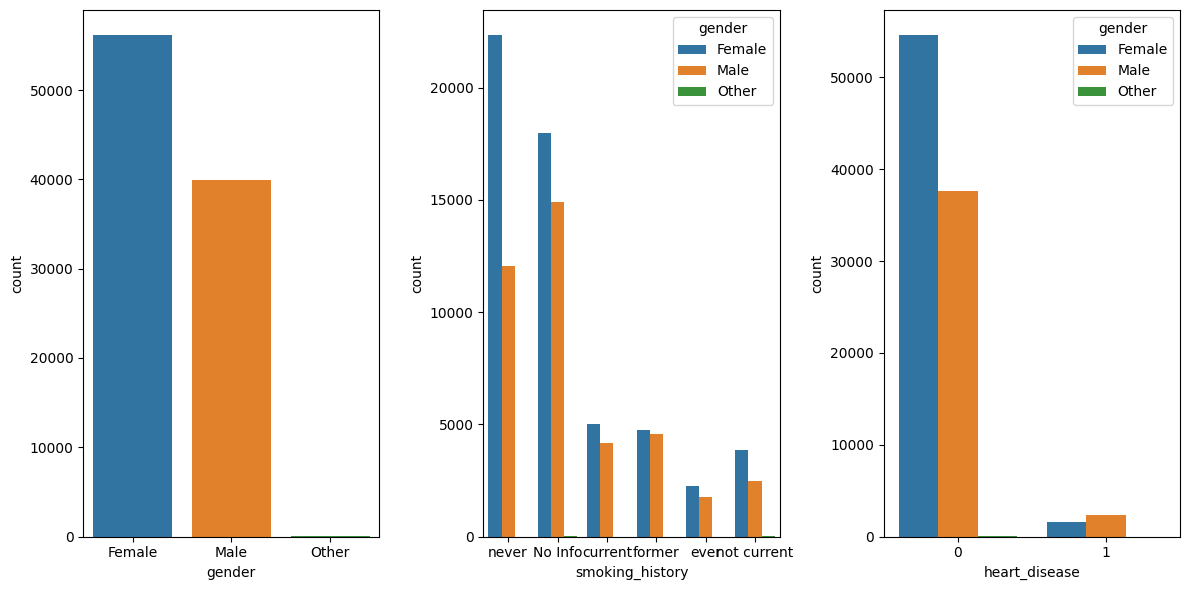

In [12]:
fig, ax = plt.subplots(1, 3, figsize = (12, 6))
sns.countplot(data = df, x = 'gender', ax = ax[0])
sns.countplot(data = df, x = 'smoking_history', hue = 'gender', ax = ax[1])
sns.countplot(data = df, x = 'heart_disease', hue = 'gender', ax = ax[2])

plt.tight_layout()
plt.show()

<b><span style="color: blue; font-size: 18px;">Checking Outliers</span></b>

<Axes: xlabel='blood_glucose_level'>

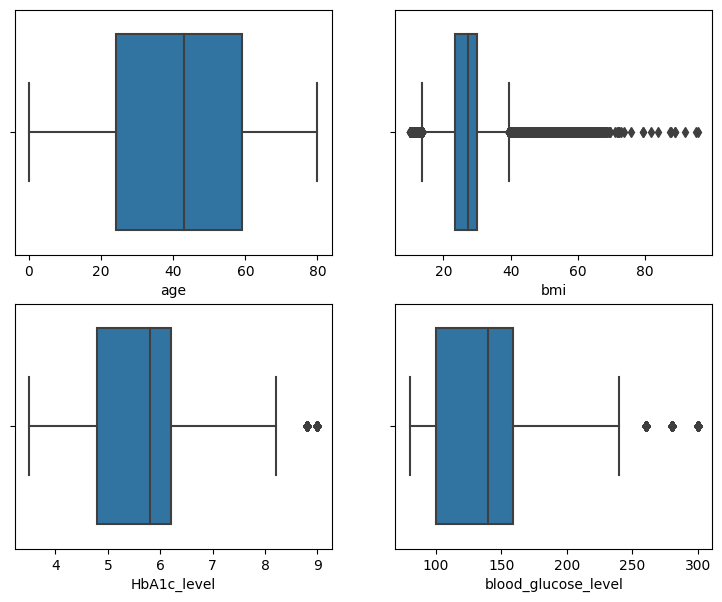

In [13]:
fig, ax = plt.subplots(2, 2, figsize = (9, 7))
sns.boxplot(data = df, x = 'age', ax = ax[0,0])
sns.boxplot(data = df, x = 'bmi', ax = ax[0,1])
sns.boxplot(data = df, x = 'HbA1c_level', ax = ax[1,0])
sns.boxplot(data = df, x = 'blood_glucose_level', ax = ax[1,1])

<b><span style="color: blue; font-size: 18px;">Data Preprocessing</span></b>

In [14]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [15]:
encoder = LabelEncoder()

df['gender'] = encoder.fit_transform(df['gender'])
df['smoking_history'] = encoder.fit_transform(df['smoking_history'])

/var/folders/r0/qtsxcwpj7r96k31gfqxpf60m0000gn/T/ipykernel_1791/907297650.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = encoder.fit_transform(df['gender'])
/var/folders/r0/qtsxcwpj7r96k31gfqxpf60m0000gn/T/ipykernel_1791/907297650.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_history'] = encoder.fit_transform(df['smoking_history'])


In [16]:
x = df.drop(columns = ['diabetes'])

y = df['diabetes']

In [17]:
#Standardization

scaler = StandardScaler()

X_scaled = scaler.fit_transform(x)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.3, random_state = 42)

In [19]:
X_train.shape

(67302, 8)

<b><span style="color: blue; font-size: 18px;">Model Building</span></b>

In [35]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_dim = 8))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 128)               1152      
                                                                 
 dense_33 (Dense)            (None, 128)               16512     
                                                                 
 dense_34 (Dense)            (None, 64)                8256      
                                                                 
 dense_35 (Dense)            (None, 64)                4160      
                                                                 
 dense_36 (Dense)            (None, 32)                2080      
                                                                 
 dense_37 (Dense)            (None, 16)                528       
                                                                 
 dense_38 (Dense)            (None, 8)                

In [36]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [37]:
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
2104/2104 [==============================] - 2s 980us/step - loss: 0.1189 - accuracy: 0.9597 - val_loss: 0.0957 - val_accuracy: 0.9662
Epoch 2/10
2104/2104 [==============================] - 2s 939us/step - loss: 0.0929 - accuracy: 0.9674 - val_loss: 0.0912 - val_accuracy: 0.9671
Epoch 3/10
2104/2104 [==============================] - 2s 936us/step - loss: 0.0908 - accuracy: 0.9683 - val_loss: 0.0872 - val_accuracy: 0.9689
Epoch 4/10
2104/2104 [==============================] - 2s 934us/step - loss: 0.0887 - accuracy: 0.9693 - val_loss: 0.0888 - val_accuracy: 0.9679
Epoch 5/10
2104/2104 [==============================] - 2s 935us/step - loss: 0.0882 - accuracy: 0.9692 - val_loss: 0.0925 - val_accuracy: 0.9674
Epoch 6/10
2104/2104 [==============================] - 2s 935us/step - loss: 0.0881 - accuracy: 0.9691 - val_loss: 0.0857 - val_accuracy: 0.9706
Epoch 7/10
2104/2104 [==============================] - 2s 934us/step - loss: 0.0869 - accuracy: 0.9696 - val_loss: 0.0859 -

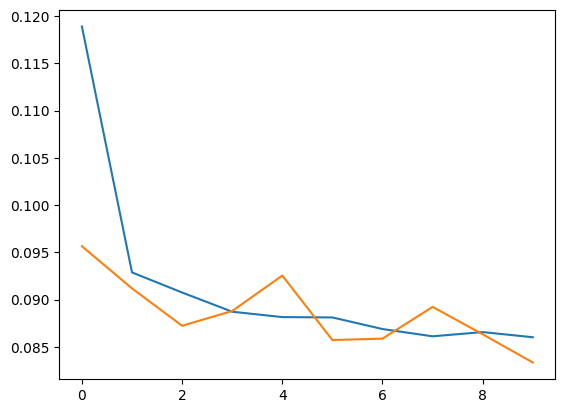

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

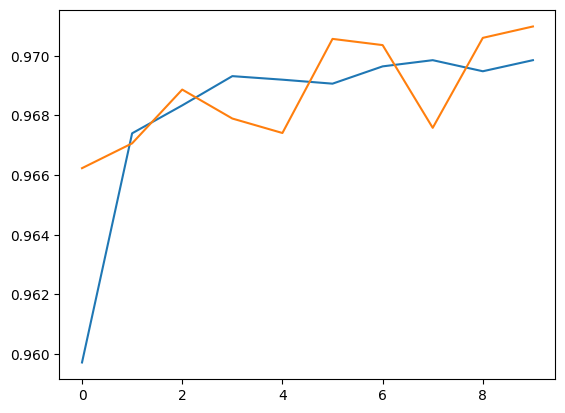

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])